# Chapter 5 - Amazon dataset

The following key is used throughout this notebook:
- **Bold** text is the input entered to ChatGPT
- *Italic* text is my thoughts, decision making
- Regular text is the output from ChatGPT

After visualizations I have generally tried to include thoughts and comments on:
- Calculated correlation
- Explanation of correlation
- Further data collection / analysis
- Recommendations

There were a very limited number of data points for several columns, so this should be kept in mind throughout the script when reading results.

In [1]:
# Download libraries
!pip install numpy pandas seaborn wordcloud plotly scikit-learn

## Import and checking of the dataset

In [37]:
import numpy as np
import pandas as pd

In [52]:
# Importing the dataset that was cleaned in chapter 4
file_path = 'H:\Documents\Software Development\QUB Software Development\Data_analysis_module\Datasets\Chapter 4 datasets\Amazon_cleaned(Complete).csv'
df = pd.read_csv(file_path)

In [39]:
# Checking the size of the dataset (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)
df.shape

(29, 13)

In [40]:
# Checking the columns of the dataset (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)
df.columns

Index(['Name', 'Name Label', 'Price (GBP)', 'Rating out of 5',
       'Number of reviews', 'Description', 'Length (cm)', 'Width (cm)',
       'Height (cm)', 'Rim', 'Tone ring', 'Tension hoop', 'Head Size (inch)'],
      dtype='object')

In [41]:
# Checking the types (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
df.dtypes

Name                  object
Name Label            object
Price (GBP)          float64
Rating out of 5      float64
Number of reviews    float64
Description           object
Length (cm)          float64
Width (cm)           float64
Height (cm)          float64
Rim                   object
Tone ring             object
Tension hoop          object
Head Size (inch)     float64
dtype: object

In [42]:
df.head()

Name         Name Label  \
0     Gold Tone Irish tenor banjo and hardshell case  Gold Tone Irish-0   
1  Gold Tone 5-string Bluegrass banjo with flange...  Gold Tone 5-str-1   
2   Gold Tone Clawhammer 5-string openback banjo 11"  Gold Tone Clawh-2   
3          Gold Tone, 4 -String Banjo, Right (IT-17)  Gold Tone, 4 -S-3   
4          Gold Tone, 4 -String Banjo, Right (IT-19)  Gold Tone, 4 -S-4   

   Price (GBP)  Rating out of 5  Number of reviews  \
0      1199.55              4.5                2.0   
1       969.24              5.0                3.0   
2       925.52              2.6                2.0   
3       919.80              5.0                1.0   
4       893.56              NaN                NaN   

                                         Description  Length (cm)  Width (cm)  \
0  - Rim: 1/2" maple - Tone ring: White Ladye - T...         82.6         7.0   
1  - Rim: Multi-ply maple - Tone ring: Bell brass...         98.4        35.6   
2  - Rim: 1/2" maple dowel - Tone ring: Rolled br...        100.3         7.0   
3  12" Irish tenors are becoming very popular in ...         79.4        33.0   
4  12" Irish tenors are becoming very popular in ...         87.0        33.0   

   Height (cm)               Rim     Tone ring   Tension hoop  \
0         30.5        1/2" maple   White Ladye  Notched steel   
1         10.2             Multi    Bell brass  Notched steel   
2         30.5  1/2" maple dowel  Rolled brass  Notched steel   
3          8.3               NaN           NaN            NaN   
4          8.3               NaN           NaN            NaN   

   Head Size (inch)  
0               NaN  
1              11.0  
2               NaN  
3              12.0  
4              12.0

In [43]:
# Printing a summary of the dataset (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               29 non-null     object 
 1   Name Label         29 non-null     object 
 2   Price (GBP)        25 non-null     float64
 3   Rating out of 5    22 non-null     float64
 4   Number of reviews  22 non-null     float64
 5   Description        27 non-null     object 
 6   Length (cm)        19 non-null     float64
 7   Width (cm)         19 non-null     float64
 8   Height (cm)        19 non-null     float64
 9   Rim                6 non-null      object 
 10  Tone ring          5 non-null      object 
 11  Tension hoop       5 non-null      object 
 12  Head Size (inch)   5 non-null      float64
dtypes: float64(7), object(6)
memory usage: 3.1+ KB


In [44]:
# Generates descriptive statistics and transposing it using .T (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
df.describe().T

count        mean         std    min      25%     50%  \
Price (GBP)         25.0  464.938000  314.547840  94.99  242.990  307.36   
Rating out of 5     22.0    4.468182    0.628215   2.60    4.325    4.55   
Number of reviews   22.0   58.681818  151.309958   1.00    2.000    4.50   
Length (cm)         19.0   88.356316   13.085430  62.79   80.350   88.90   
Width (cm)          19.0   33.247895   13.568247   7.00   28.200   33.00   
Height (cm)         19.0   15.541579    8.726384   7.60    9.670   13.00   
Head Size (inch)     5.0   11.400000    0.547723  11.00   11.000   11.00   

                       75%      max  
Price (GBP)        698.320  1199.55  
Rating out of 5      5.000     5.00  
Number of reviews   24.500   675.00  
Length (cm)        100.315   105.60  
Width (cm)          45.210    49.00  
Height (cm)         15.875    35.60  
Head Size (inch)    12.000    12.00

## Create a plan with ChatGPT

**You are an expert in EDA (Exploratory Data Analysis) and producing useful visualisations.
I have a dataset that contains information about different banjos that are currently for sale on Amazon.co.uk. Here are the columns and their descriptions:**

**Name: The full name or title of the banjo, including specific details about the model and accessories (e.g., hardshell case).
Name Label: A shorter, labeled version of the banjo's name, 15 chars.
Price: The price of the banjo in GBP.
Rating out of 5: The rating of the banjo based on customer reviews, scaled from 0 to 5.
Number of reviews: The total number of customer reviews received for the banjo.
Description: A textual description of the banjo, including various details and features.
Length (cm): The length of the banjo in centimeters.
Width (cm): The width of the banjo in centimeters.
Height (cm): The height of the banjo in centimeters.
Rim: Details about the rim of the banjo, describing the material or structure.
Tone ring: Information about the tone ring of the banjo, a component that affects the sound.
Tension hoop: Description of the tension hoop of the banjo, which is related to the tightness of the head.
Head Size (inch): The size of the banjo's head (the part that vibrates to produce sound) in inches.**

**Prepare a detailed, step-by-step EDA plan which I can follow which will produce useful insights.**

Great! It looks like you've uploaded the dataset. Let's create a step-by-step Exploratory Data Analysis (EDA) plan that will help you gain insights into the data and visualize the key features of banjos available on Amazon.co.uk. Here's how you can proceed:

Step 1: Initial Data Exploration

1.1 Load the Data
Load the dataset into a DataFrame using pandas.
Check the first few rows to understand the data structure.
Verify that the columns correspond to the provided descriptions.

1.2 Summary Statistics
Use the describe() method to get the summary statistics for numerical columns.
Use the info() method to check for missing values and data types.

Step 2: Univariate Analysis

2.1 Analyzing Numerical Features
Plot histograms for "Price," "Rating out of 5," "Number of reviews," "Length (cm)," "Width (cm)," "Height (cm)," and "Head Size (inch)." This will give you an idea of the distributions.

2.2 Analyzing Categorical Features
Examine the unique values for "Rim," "Tone ring," and "Tension hoop."
Plot bar charts to show the frequency of each category.

Step 3: Bivariate Analysis

3.1 Price Analysis
Plot a scatter plot or box plot to see the relationship between "Price" and "Rating out of 5."
Investigate how the "Price" varies with different "Rim," "Tone ring," and "Tension hoop" categories.

3.2 Rating Analysis
Explore how "Rating out of 5" varies with the "Number of reviews."

3.3 Dimension Analysis
Create scatter plots to see relationships between "Length (cm)," "Width (cm)," and "Height (cm)."

Step 4: Multivariate Analysis

4.1 Correlation Matrix
Calculate the correlation matrix for numerical variables and plot a heatmap to visualize the relationships.

4.2 Pairplot
Create a pairplot for numerical variables to visualize pairwise relationships.

Step 5: Text Analysis (Optional)

5.1 Analyzing Name and Description
You can perform text analysis on the "Name" and "Description" columns to find common words or phrases.
Utilize word clouds or bar charts to visualize the most common terms.

Step 6: Outliers and Missing Value Treatment

Check for outliers in the numerical columns and decide whether to treat or remove them.
If any missing values are found, handle them appropriately (e.g., impute or drop).

Step 7: Summary and Insights

Summarize the key findings and insights from the above analyses.
Formulate recommendations or conclusions based on the insights.
Feel free to navigate through the steps as per your needs and curiosity. If you'd like, I can guide you through the actual implementation of each step, starting with the initial data exploration. Let me know if you'd like to proceed!

## Univariate Analysis

*Univariate analysis has been completed in Chapter 4. Various graphs were produced to display the most important columns of data that I want to investigated including:*

 *- Price*
 
 *- Rating*
 
 *- Number of reviews*
 
 *- Product dimensions*
 
 *- Distribution of numerical data*

## Bivariate Analysis

In [45]:
# Set up some new dataframes for use during analysis

# Create subsets of the dataframe for each analysis, dropping rows with missing values as appropriate

df_price_ratings = df[['Price (GBP)', 'Rating out of 5']].dropna()
df_price_reviews = df[['Price (GBP)', 'Number of reviews']].dropna()
df_ratings_reviews = df[['Rating out of 5', 'Number of reviews']].dropna()
df_dimensions = df[['Length (cm)', 'Width (cm)', 'Height (cm)', 'Price (GBP)', 'Rating out of 5', 'Number of reviews']].dropna()
numeric_cols = ['Price (GBP)', 'Rating out of 5', 'Number of reviews', 'Length (cm)', 'Width (cm)', 'Height (cm)', 'Head Size (inch)']
df_numeric_cols = df[numeric_cols]

# Check the first few rows of each new dataframe
dfs = [df_price_ratings, df_price_reviews, df_ratings_reviews, df_dimensions, df_numeric_cols]
df_names = ['df_price_ratings', 'df_price_reviews', 'df_ratings_reviews', 'df_dimensions', 'df_numeric_cols']

for df, name in zip(dfs, df_names):
    print(f"{name}:\n")
    print(df.head(), "\n")

df_price_ratings:

   Price (GBP)  Rating out of 5
0      1199.55              4.5
1       969.24              5.0
2       925.52              2.6
3       919.80              5.0
6       698.32              4.5 

df_price_reviews:

   Price (GBP)  Number of reviews
0      1199.55                2.0
1       969.24                3.0
2       925.52                2.0
3       919.80                1.0
6       698.32                3.0 

df_ratings_reviews:

   Rating out of 5  Number of reviews
0              4.5                2.0
1              5.0                3.0
2              2.6                2.0
3              5.0                1.0
6              4.5                3.0 

df_dimensions:

   Length (cm)  Width (cm)  Height (cm)  Price (GBP)  Rating out of 5  \
0         82.6         7.0         30.5      1199.55              4.5   
1         98.4        35.6         10.2       969.24              5.0   
2        100.3         7.0         30.5       925.52              2.6   
3  

**I now want you to tackle step 3 of the analysis plan you came up with - bivariate analysis.  Use seaborn to visualize correlations. I created some new dataframes to help with the analysis: df_price_ratings = df[['Price (GBP)', 'Rating out of 5']].dropna()
df_price_reviews = df[['Price (GBP)', 'Number of reviews']].dropna()
df_ratings_reviews = df[['Rating out of 5', 'Number of reviews']].dropna()
df_dimensions = df[['Length (cm)', 'Width (cm)', 'Height (cm)', 'Price (GBP)', 'Rating out of 5', 'Number of reviews']].dropna()
df_numeric_cols = df[numeric_cols]**

Certainly! We will proceed with the bivariate analysis using the new DataFrames you created. We'll visualize the correlations between different pairs of attributes using Seaborn.

Step 3: Bivariate Analysis
3.1 Price vs. Ratings Analysis
Using the df_price_ratings DataFrame, we'll create a scatter plot to visualize the relationship between the Price and Ratings of the banjos.

3.2 Price vs. Number of Reviews Analysis
Using the df_price_reviews DataFrame, we'll create a scatter plot to visualize the relationship between the Price and the Number of Reviews.

3.3 Ratings vs. Number of Reviews Analysis
Using the df_ratings_reviews DataFrame, we'll create a scatter plot to see how Ratings are related to the Number of Reviews.

3.4 Dimension Analysis
Using the df_numeric_cols DataFrame, we'll create scatter plots to see relationships between Length, Width, Height, Price, Ratings, and Number of Reviews.

Let's start with the first visualization, the scatter plot between Price and Ratings.

Since you already have the required DataFrames prepared (df_price_ratings, df_price_reviews, df_ratings_reviews, df_dimensions, df_numeric_cols), please go ahead and run the following code snippet in your local environment for the scatter plot between Price and Ratings:

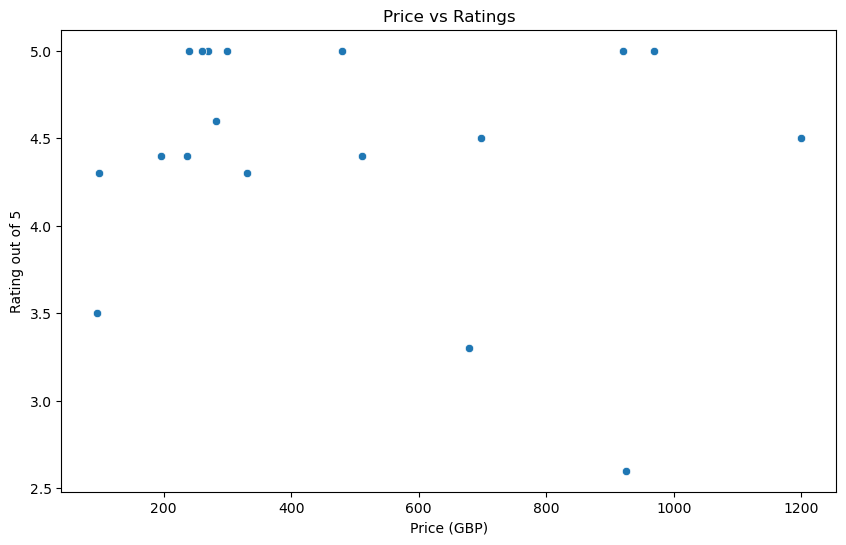

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price (GBP)', y='Rating out of 5', data=df_price_ratings)
plt.title('Price vs Ratings')
plt.xlabel('Price (GBP)')
plt.ylabel('Rating out of 5')
plt.show()


The calculated Pearson correlation coefficient between the "Price (GBP)" and "Rating out of 5" for the banjos is approximately 
−0.1349.

*More data would need to be collected to find out if this negative correlation does exist. If so, it would show that as prices increase, the average rating decreases. A possible explanation for this could be that when customers pay more for a product, they have higher expectations. If you pay £1000+ for an instrument and it isn't perfect, then you may be more inclined to leave a negative comment or take a point off the rating. Whereas a cheap instrument with several imperfections could leave customers thinking "It's great for the money".*

*If resources allowed, it would be interesting to let users test the same banjos but give users different figures for the asking price of the banjo. This way we could see if a more expensive price tag causes users to be more critical of the product.*

*One recommendation for a business owner would be to ensure quality control, especially for higher-priced refurbished banjos, as customers may have higher expectations at those price points.*

Let's continue with the bivariate analysis. Since you have the DataFrames prepared, you can execute the following code snippets locally to visualize the correlations.

3.2 Price vs. Number of Reviews Analysis
Using the df_price_reviews DataFrame, create a scatter plot to visualize the relationship between Price and the Number of Reviews.

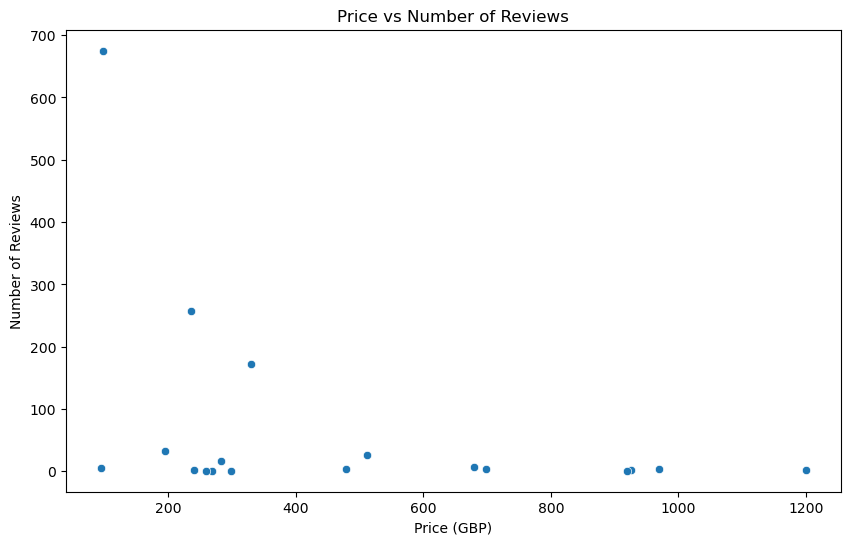

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price (GBP)', y='Number of reviews', data=df_price_reviews)
plt.title('Price vs Number of Reviews')
plt.xlabel('Price (GBP)')
plt.ylabel('Number of Reviews')
plt.show()


The calculated Pearson correlation coefficient between the "Price (GBP)" and "Number of reviews" for the banjos is approximately −0.3771.

*This value suggests a moderate correlation meaning that when price increases, the number of reviews tends to decrease and vice versa. A likely explanation for this is down to the number of banjos sold in each price category. As with all instruments, many more entry-level banjos are sold compared to expensive professional instruments. I don't have Amazon's figures on the units of each banjo model sold for this dataset, but I know this to be true for the wider market. It would be very surprising if more £1000+ banjos are sold compared with sub £300 banjos.*

*Another explanation could be that as prices increase, customers are happier with the item. We know that unhappy customers in general are more motivated to leave a review, while happy customers likely won't leave one. I realise this is slightly at odds with the previous visualisation, but the findings are based on very limited data.*

*Ideally I would need to have data on the units sold for each model in my dataset, then break down the banjos by price bracket. Then the number of reviews per 100 banjos in each price bracket could be compared.*

*My only recommendation would be for a banjo retailer to implement strategies to encourage reviews from customers who purchase higher-priced banjos, such as follow-up emails or incentives for reviews. This is of course dependent on whether a positive correlation is found between 'Price' and 'Rating out of 5' with further investigation.*

3.3 Ratings vs. Number of Reviews Analysis
Using the df_ratings_reviews DataFrame, create a scatter plot to see how Ratings are related to the Number of Reviews.

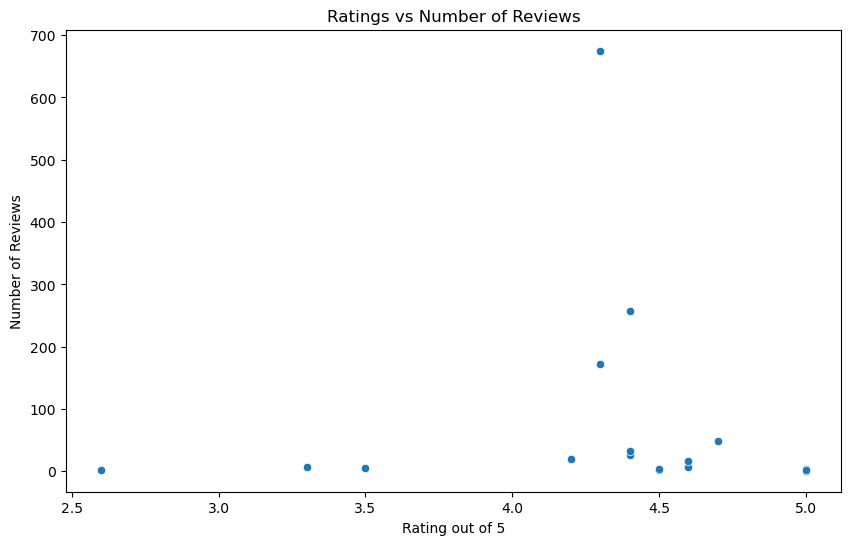

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating out of 5', y='Number of reviews', data=df_ratings_reviews)
plt.title('Ratings vs Number of Reviews')
plt.xlabel('Rating out of 5')
plt.ylabel('Number of Reviews')
plt.show()

The calculated Pearson correlation coefficient between the "Number of reviews" and "Rating out of 5" for the banjos is approximately −0.0826.

*This value indicates a very weak correlation, which doesn't provide any real insights on its own. Further analysis could be done on the outlier in the above scatter plot to find out why there are so many reviews for that particular product. If it's simply the case that many more of that product have been sold in comparison to the others, then why? What characteristics does the banjo have that make it such a popular product on Amazon?*

3.4 Dimension Analysis
Using the df_numeric_cols DataFrame, you can create scatter plots to see relationships between Length, Width, Height, Price, Ratings, and Number of Reviews. You may use pairplot to visualize all these relationships at once:

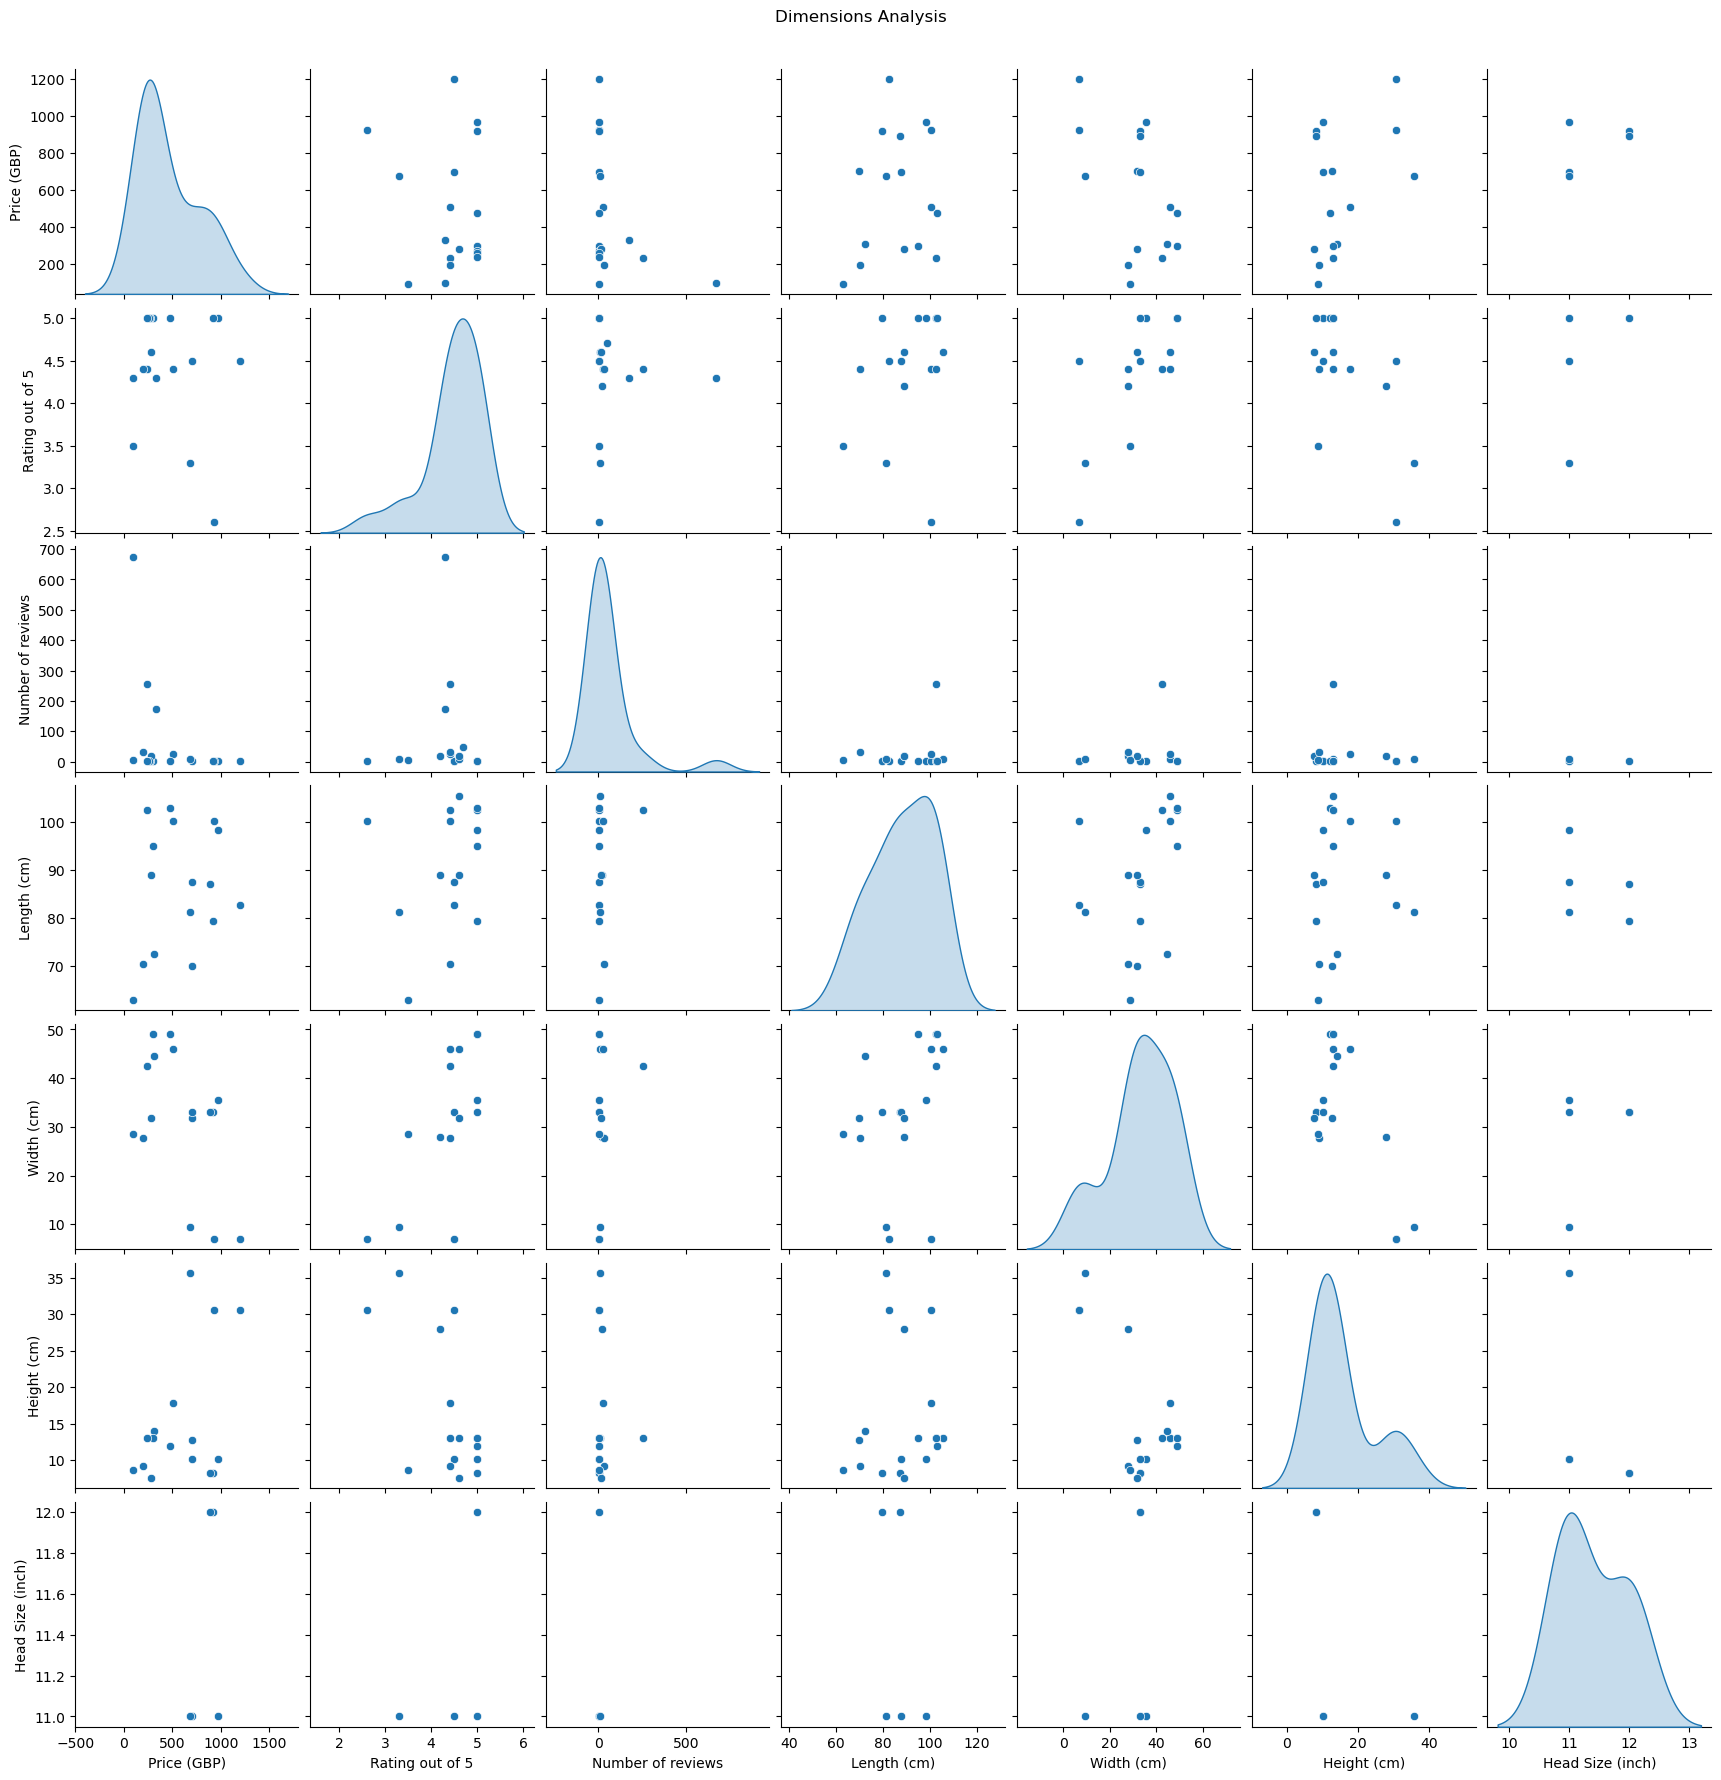

In [49]:
sns.pairplot(df_numeric_cols, diag_kind='kde')
plt.suptitle('Dimensions Analysis', y=1.02)
plt.show()

# Multivariate Analysis

**Next look at multivariate analysis. Start with 4.1 from earlier - correlation matrix**

Certainly! The correlation matrix provides an insight into how different numerical variables are related to each other. This is particularly useful in understanding the linear relationships between different features in the dataset.

Since you have the df_dimensions DataFrame ready, which includes various numerical attributes such as Length, Width, Height, Price, Ratings, and Number of Reviews, you can use it to create a correlation matrix.

Here's the code snippet to calculate the correlation matrix and visualize it using a heatmap:

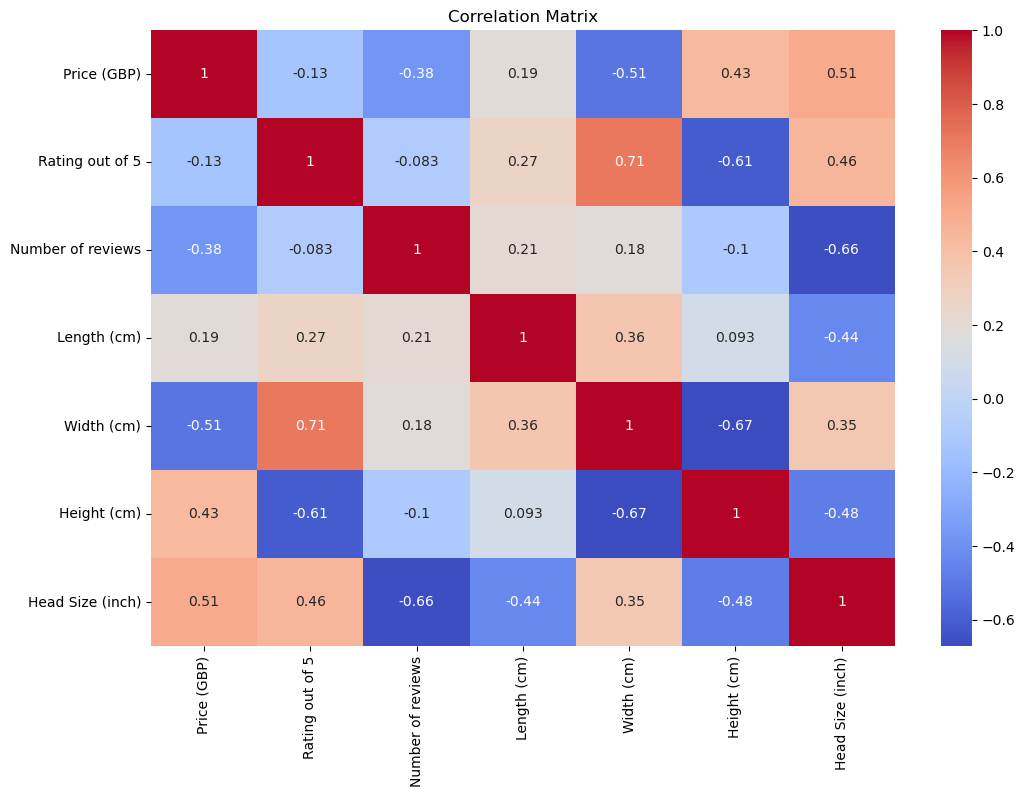

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_numeric_cols.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


This code will create a heatmap, where the color intensity and the annotation values represent the correlation coefficients between the pairs of variables. Correlation values range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

Let's move on to the next part of the multivariate analysis.

4.2 Pairplot
A pairplot allows us to visualize pairwise relationships between different numerical variables in the dataset. It can be an excellent way to quickly identify correlations, distributions, and potential outliers among different attributes.

Since you have the df_numeric_cols DataFrame that includes the Length, Width, Height, Price, Ratings, and Number of Reviews, you can use it to create a pairplot.

Here's the code snippet to create the pairplot:

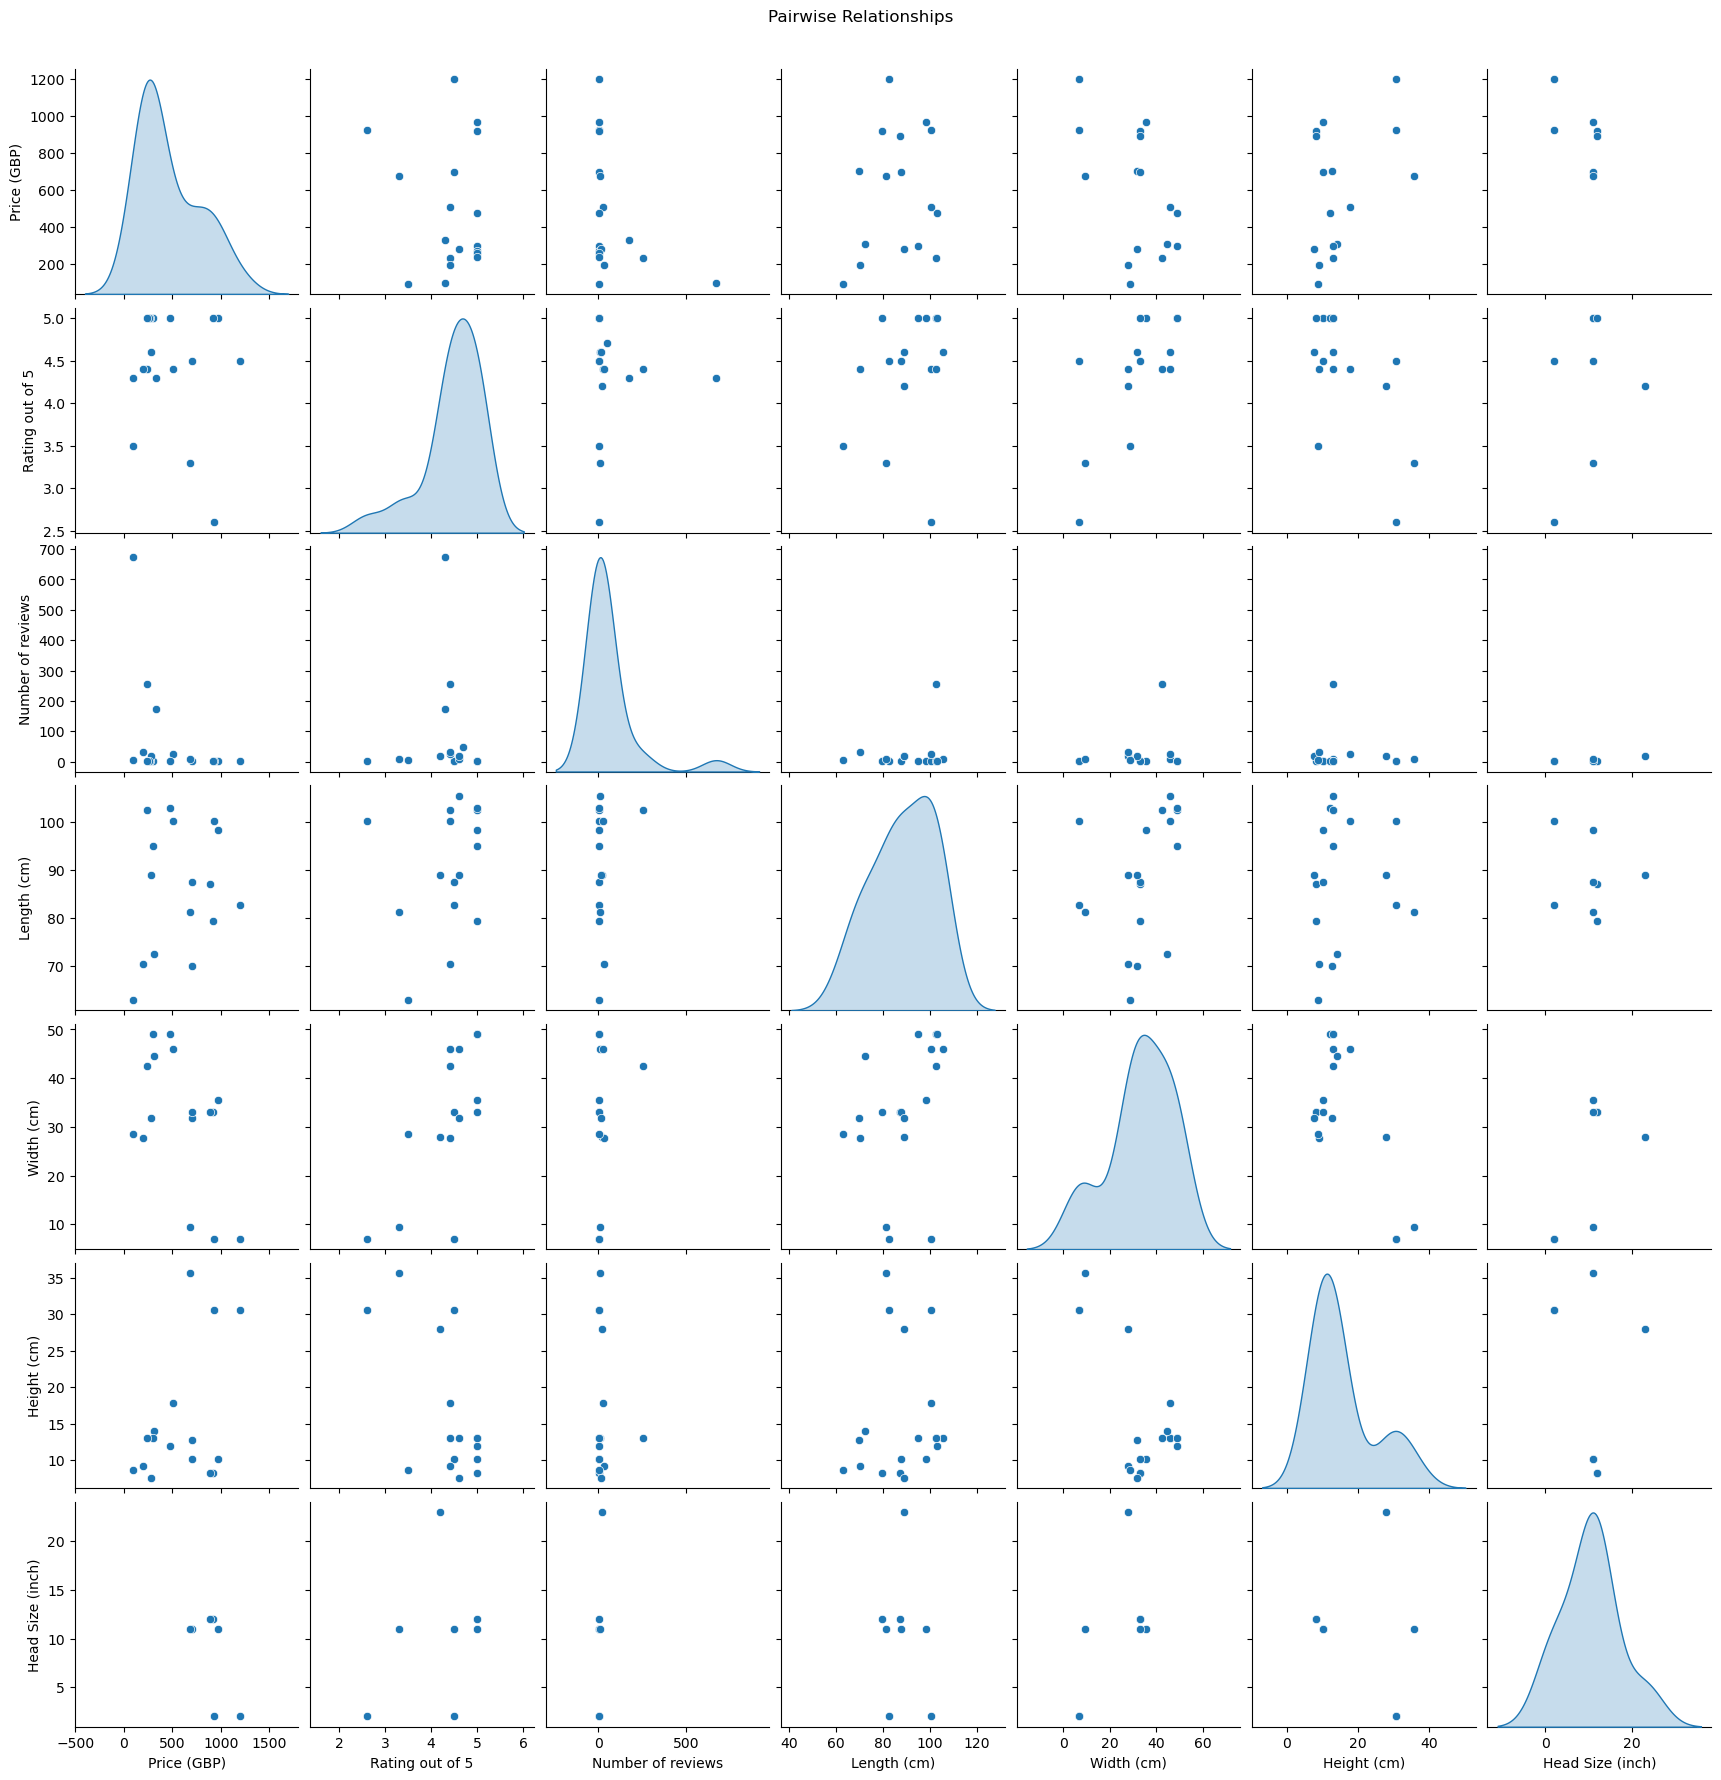

In [22]:
sns.pairplot(df_numeric_cols, diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


This code will produce a grid of scatter plots for each pair of variables, along with Kernel Density Estimation (KDE) plots on the diagonal to show the univariate distribution of each variable.

The pairplot provides a comprehensive view of the relationships and can help you identify trends, correlations, and patterns across different attributes.

*There are a number of correlations that jump out looking at the matrix and pairplot above:*

*- Positive correlation of 0.71 between 'Width' and 'Rating out of 5'*

*- Positive correlation of 0.51 between 'Head size' and 'Price'*

*- Negative correlation of -0.67 between 'Width' and 'Height'*

*- Negative correlation of -0.66 between 'Number of reviews' and 'Head size'*

*- Negative correlation of -0.61 between 'Rating out of 5' and 'Height'*


## 'Width' and 'Rating out of 5'

**There appears to be a correlation between 'Width (cm)' and 'Rating out of 5'. Could you investigate this and calculate the correlation**

In [44]:
# Calculating the Pearson correlation coefficient between "Width (cm)" and "Rating out of 5"
correlation_width_rating = df['Width (cm)'].corr(df['Rating out of 5'])
correlation_width_rating

0.7122171405781857

The calculated Pearson correlation coefficient between the "Width (cm)" of the banjos and the "Rating out of 5" is approximately 
0.7122
0.7122.

This positive value indicates a strong positive linear relationship between these two variables. Here's what this correlation tells us:

Interpretation:
Positive Relationship: A higher width in centimeters is associated with a higher customer rating (out of 5), and vice versa.

Strong Correlation: The value of 0.7122 indicates a strong correlation, suggesting that the width of the banjos is a significant factor associated with customer ratings.

Possible Explanations:

Sound Quality: The width of the banjo may influence the sound resonance and quality. Wider banjos might produce a more desirable sound, leading to higher customer satisfaction and ratings.

Playability: A wider banjo might provide a more comfortable playing experience for certain styles or preferences, contributing to higher ratings.

Aesthetic Appeal: The width of the banjo might be associated with a particular aesthetic or design that is favored by customers.

*I agree with chatGPT to a certain extent about the possible explanations for the correlation between width and rating. From my own research I know that most tenor banjos come with a wooden resonator on the back, but some cheaper models don't and so aren't much wider than the tension hoop. So the explanation of 'sound quality' has some truth. Speaking to my expert I learned that traditional Irish players, (100% of his customer base), are looking for a loud banjo with a focused trebly tone. The resonator is one of the main components responsible for directing the sound forward with enhanced treble frequencies, so the relationship between width and rating makes sense to me. Banjos with a resonator will almost always be wider.*

*It must be noted for basically everything in this dataset, that the sanmple size is too small to draw any conclusions from. If I were to continue with this investigation I would try to find banjos with/without resonators that are in a similar price range and compare the ratings.*

*ChatGPT also mentioned playability and aesthetic appeal which I'm less sure on. There will be a slight difference in playing feel as banjos with a resonator will sit slightly higher in the lap. Customers on Amazon can see photos of the banjo they're buying, so I'm unsure why they would rate the banjo they chose lower based on aesthetics.*

## 'Head size' and 'Price'

A correlation of 0.51 indicates a moderate positive relationship between the head size of the banjo and its price. As the head size increases, the price also tends to increase, and vice versa.

*One explanation for this relationship could be down to the price of materials. The head of a banjo is made from goat skin, and so it may be more expensive to acquire high quality goat skins covering a greater surface area. The bridge is also glued directly to the head, so all of the string vibration is transmitted to the head. Players might perceive a larger head as having a better sound quality, or they may be louder which is something traditional Irish players look for.*

*There are only 5 banjos in my dataset with values for the head size, so to validate this it would be necessary to collect more data.*

*If the positive correlation continues with a larger dataset, I would recommend that the banjo refurbishment company focus their search for stock on banjos with a larger head size.*

## 'Width' and 'Height'

*A negative correlation of −0.67 between the "Width" and "Height" of the banjos represents a moderate to strong negative relationship between these two dimensions. As the width of the banjo increases, the height tends to decrease, and vice versa.*

*There is a simple explanation for this relationship - there are a number of banjos aimed at bluegrass players in the dataset which tend to have longer necks and 5 strings, but often don't have a resonator and so aren't as wide in the body. Tenor banjos (which trad Irish players use) are shorter and wider.*

*I'm now going to see if i can separate the tenor banjos from the bluegrass banjos and compare the average width and lengths to confirm my hypothesis:*

**I want to create a new dataframe, convert the 'Name' category to lowercase, then identify banjos that contain '4 string' or '4-string' in the name and group them, then '5 string' or '5-string' or 'bluegrass' in the name and group them. Then i want to work out the average length and width for both groups. Can you give me the code?**

In [54]:
# Identifying banjos that contain '4 string' or '4-string' in the name (case-insensitive)
group_4_string = df[df['Name'].str.lower().str.contains('4 string|4-string')]

# Identifying banjos that contain '5 string' or '5-string' or 'bluegrass' in the name (case-insensitive)
group_5_string = df[df['Name'].str.lower().str.contains('5 string|5-string|bluegrass')]

# Concatenating both groups to create the new DataFrame
df_tenor_or_bluegrass = pd.concat([group_4_string, group_5_string])

# Calculating the average length and width for 4-string banjos
avg_length_4_string = group_4_string['Length (cm)'].mean()
avg_width_4_string = group_4_string['Width (cm)'].mean()

# Calculating the average length and width for 5-string banjos
avg_length_5_string = group_5_string['Length (cm)'].mean()
avg_width_5_string = group_5_string['Width (cm)'].mean()

# Printing the results
print("4-String Banjos:")
num_4_string_banjos = len(group_4_string)
print("Number of 4-String Banjos:", num_4_string_banjos)
print("Average Length:", avg_length_4_string, "cm")
print("Average Width:", avg_width_4_string, "cm")

print("\n5-String/Bluegrass Banjos:")
num_5_string_banjos = len(group_5_string)
print("Number of 5-String/Bluegrass Banjos:", num_5_string_banjos)
print("Average Length:", avg_length_5_string, "cm")
print("Average Width:", avg_width_5_string, "cm")

4-String Banjos:
Number of 4-String Banjos: 15
Average Length: 79.4675 cm
Average Width: 31.9675 cm

5-String/Bluegrass Banjos:
Number of 5-String/Bluegrass Banjos: 6
Average Length: 100.90599999999999 cm
Average Width: 36.013999999999996 cm


*My theory wasn't 100% correct, but the negative correlation between length and width that was calculated earlier was based on the entire dataset, considering all types and variations of banjos. This calculation was only based on banjos that explicitly stated whether they were 4 string, 5 string, or a bluegrass banjo.*

##  'Number of reviews' and 'Head size'

*A negative correlation of −0.66 between "Number of reviews" and "Head size" in the dataset indicates a moderate to strong negative relationship between these two variables. As the head size of the banjo increases, the number of reviews tends to decrease.*

*We have already seen that: as head sizes increase, the price also increases; and as price increases, the number of reviews decreases. The negative correlation between "Number of Reviews" and "Head Size" can be understood as a result of these interconnected relationships.*

## 'Rating out of 5' and 'Height'

*A negative correlation of −0.61 between "Rating out of 5" and "Height" indicates a moderate to strong negative relationship between these two variables in your dataset. As the height of the banjo increases, the customer rating tends to decrease, and vice versa.*

*Taller banjos might be less comfortable or more challenging to play for some individuals, leading to lower ratings. The height could impact the ease of handling, finger positioning, or overall playing experience. Alternatively, the height might influence the tonal characteristics of a banjo in an unfavourable way that I'm unaware of.*

*This could be another opportunity to test banjos side by side to gain insights into player preferences and find out taller banjos are less favoured. My expert has a small showroom with various banjos, so it may be beneficial for them to ask potential customers for their opinion on banjos of different heights. I would advise that they cover the prices and brand logos to avoid these factors influencing opinions.*

*If it is found that customers do prefer banjos with less height, it could be another characteristic to look for when sourcing stock.*

# Text Analysis

**Now do the textual analysis with word clouds etc. It would make sense to use the 'Name' and 'Description' columns for this.**

Certainly! Textual analysis allows us to explore and visualize the most common words and phrases within text data. In this case, we'll analyze the 'Name' and 'Description' columns of the dataset to create word clouds and possibly other visualizations.

Step 5: Text Analysis
5.1 Analyzing 'Name' and 'Description' Columns
5.1.1 Word Cloud for 'Name' Column
We'll start by creating a word cloud for the 'Name' column to visualize the most frequent terms in the banjo names.

In [24]:
print(df.head())

   Length (cm)  Width (cm)  Height (cm)  Price (GBP)  Rating out of 5  \
0         82.6         7.0         30.5      1199.55              4.5   
1         98.4        35.6         10.2       969.24              5.0   
2        100.3         7.0         30.5       925.52              2.6   
3         79.4        33.0          8.3       919.80              5.0   
6         87.6        33.0         10.2       698.32              4.5   

   Number of reviews  
0                2.0  
1                3.0  
2                2.0  
3                1.0  
6                3.0  


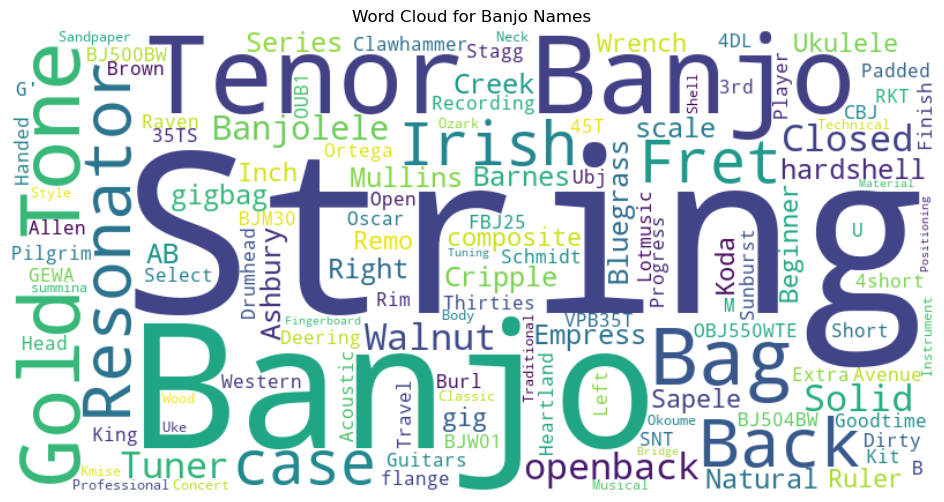

In [29]:
from wordcloud import WordCloud

# Combining all the names into a single string
name_text = ' '.join(df['Name'].dropna())

# Creating a WordCloud object
wordcloud_name = WordCloud(width=800, height=400, background_color='white').generate(name_text)

# Displaying the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_name, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Banjo Names')
plt.show()


*Aside from the obvious words such as 'banjo' or 'string', some interesting words do appear when running a word cloud on the name category. The 'Gold Tone' brand name stands out, as well as 'resonator' which I've already discussed as an important feature to trad players. Additional accessories like 'case' and 'bag' crop up too.*

*Including key features and accessories in the name when advertising a banjo on sites such as Gumtree could make a useful recommendation for my expert. I got the impression through our conversation that they already put a lot of stock in the brand name and model of the banjo, but other features could potentially be just as effective at getting views.*

*Gathering more data on adverts of the same product but using different wording in the name would be of value in this case.*

5.1.2 Word Cloud for 'Description' Column
Similarly, we can create a word cloud for the 'Description' column to visualize the most common terms in the banjo descriptions.

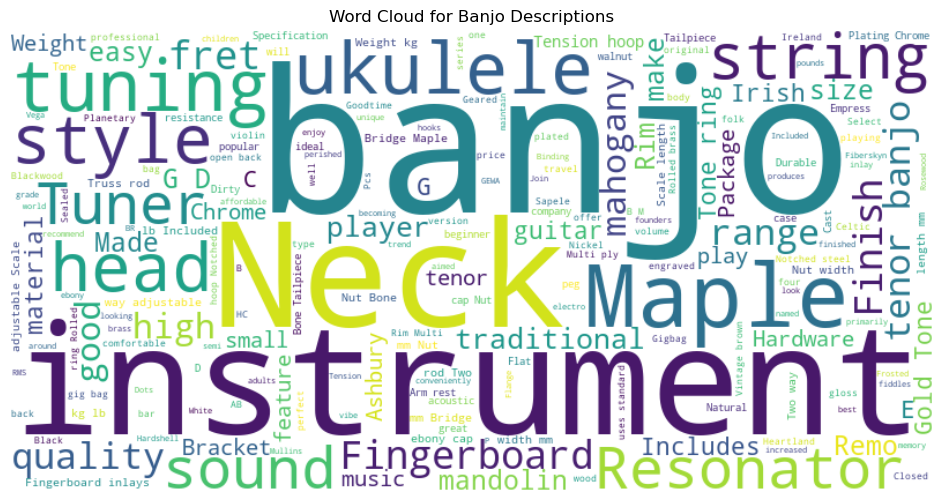

In [30]:
# Combining all the descriptions into a single string
description_text = ' '.join(df['Description'].dropna())

# Creating a WordCloud object
wordcloud_description = WordCloud(width=800, height=400, background_color='white').generate(description_text)

# Displaying the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Banjo Descriptions')
plt.show()


These word clouds will give you a quick and visually appealing overview of the most frequent terms in the 'Name' and 'Description' columns. You may identify specific keywords, brand names, or features that are commonly associated with the banjos in the dataset.

**What other analysis can we perform on the data?**

Certainly! Beyond the analyses we've discussed so far, there are several other aspects we can explore within the dataset. Here's an overview of additional analyses that might be valuable:

1. Feature Engineering and Analysis

1.1 Price Categories

You can categorize the banjos into different price ranges (e.g., low, medium, high) and analyze the distribution and characteristics within each category.

1.2 Rating Categories

Similar to price, you can categorize the banjos based on their ratings and explore the features that contribute to higher or lower ratings.

2. Outlier Analysis

Identify and visualize outliers in attributes like price, ratings, dimensions, etc.
Investigate why these outliers exist and whether they should be treated or removed.

3. Text Length Analysis

Analyze the length of the 'Name' and 'Description' columns.
Check if there's a correlation between the length of the description and other variables like price or rating.

4. Sentiment Analysis (Optional)

Perform sentiment analysis on the 'Description' column to determine the sentiment (positive, negative, neutral) conveyed in the descriptions.
Analyze how sentiment correlates with ratings or price.

5. Clustering

Apply clustering techniques (e.g., K-Means) to group similar banjos.
Investigate the characteristics that define each cluster.

6. Trend Analysis (if time series data is available)

Analyze trends over time, such as price fluctuations, changes in ratings, or popularity of specific features.

7. Geographic Analysis (if location data is available)

Analyze geographical patterns, such as popularity or availability in different regions.

8. Comparative Analysis with Other Instruments (if data is available)

Compare the characteristics of banjos with other musical instruments to identify unique features or trends.

9. Impact of Accessories and Additional Features

Analyze the impact of accessories or additional features mentioned in the 'Name' or 'Description' on the price, rating, or other aspects.

10. Predictive Modeling (Optional)

If you have specific goals or hypotheses, you can build predictive models to estimate price, ratings, or other outcomes based on the available features.

11. User-Generated Insights

Depending on your specific interests or business questions, you can tailor the analysis to derive insights that are most relevant to you.
Please let me know which of these analyses you'd like to pursue, or if you have any specific questions or goals in mind. We can dive deeper into the aspects that are most relevant to your interests!

## Price Range Analysis

**Give me the code for 1.1**

Certainly! Categorizing the banjos into different price ranges and analyzing the distribution and characteristics within each category can provide valuable insights into the product offering. Here's how you can proceed:

Step 1: Define Price Categories
You can define price categories based on your understanding of the price range or by using statistical measures like quartiles. For simplicity, we'll categorize the banjos into three groups: low, medium, and high price.

Step 2: Assign Categories to Banjos
Based on the defined ranges, you can create a new column in the DataFrame that assigns each banjo to a price category.

Step 3: Visualize and Analyze the Categories
You can then visualize the distribution of banjos across the categories and analyze other variables within each category.

This code will categorize the banjos into low, medium, and high price ranges and visualize the distribution. It will also print the average rating within each price category, allowing you to see if there's a correlation between price and rating.

**Fix the y-axis scale so that it goes up to the highest value displayed.  Alongside the mean rating, also print the mean number of ratings**

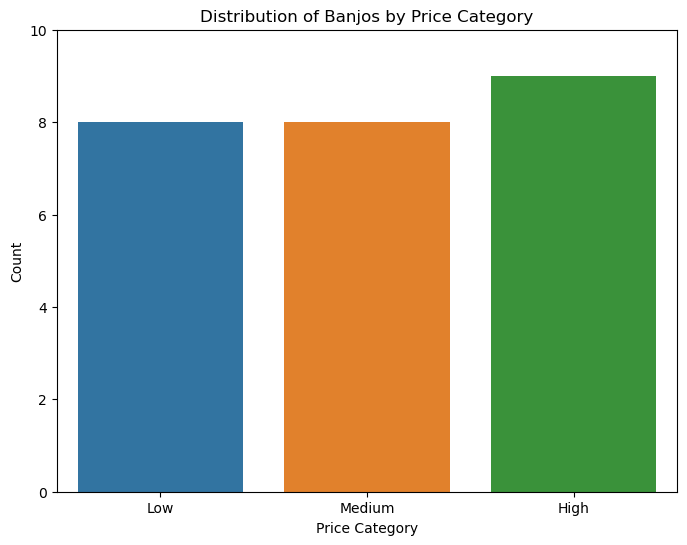

  Price_Category  Rating out of 5  Number of reviews  Price (GBP)
0            Low         4.433333         162.333333   192.780000
1         Medium         4.780000          39.000000   322.507500
2           High         4.185714           6.285714   833.461111


In [56]:
# Step 1: Define Price Categories
price_bins = [df['Price (GBP)'].min(), df['Price (GBP)'].quantile(0.33), df['Price (GBP)'].quantile(0.66), df['Price (GBP)'].max()]
price_labels = ['Low', 'Medium', 'High']

# Step 2: Assign Categories to Banjos
df['Price_Category'] = pd.cut(df['Price (GBP)'], bins=price_bins, labels=price_labels, include_lowest=True)

# Step 3: Visualize the Distribution of Banjos by Price Category
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Price_Category', data=df, order=price_labels)
plt.title('Distribution of Banjos by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.ylim(0, ax.get_yticks()[-1])  # Set the y-axis scale to the highest value displayed
plt.show()

# Analyzing the average rating and number of reviews within each price category
price_analysis = df.groupby('Price_Category')[['Rating out of 5', 'Number of reviews', 'Price (GBP)']].mean().reset_index()
print(price_analysis)


**I need a graph to investigate the mean number of reviews for each price range. I notice that there are less reviews as the banjos get more expensive**

Certainly! A histogram can be used to visualize the distribution of the mean number of reviews across different price categories. Since we already have the mean number of reviews for each price category, we can create a bar plot to represent this information.

This code will create a bar plot that shows the mean number of reviews for the Low, Medium, and High price categories. It provides a visual representation of how the number of reviews varies across different price ranges.

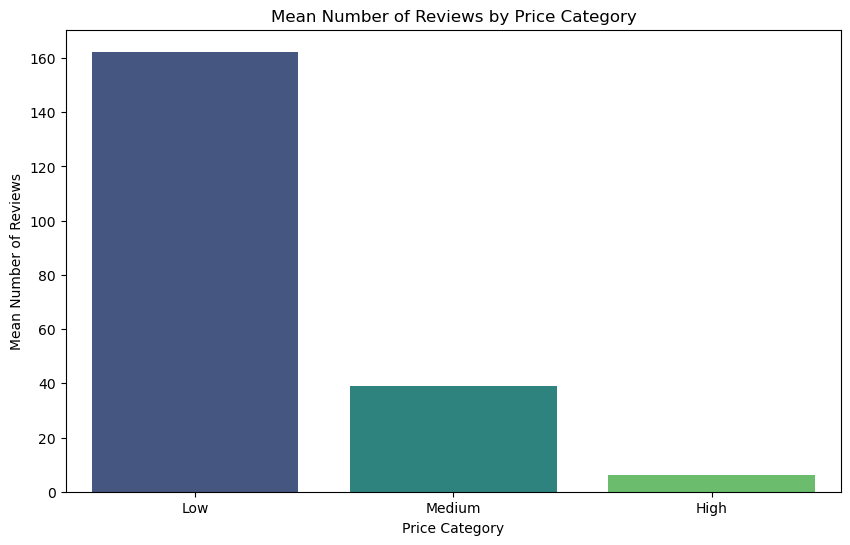

In [32]:
# Plotting the mean number of reviews for each price category
plt.figure(figsize=(10, 6))
sns.barplot(x='Price_Category', y='Number of reviews', data=price_analysis, palette='viridis')
plt.title('Mean Number of Reviews by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Mean Number of Reviews')
plt.show()

*There is a clear negative relationship between price and the number of reviews. As the price category increases, the average number of reviews decreases. This may indicate that higher-priced banjos are purchased less frequently or appeal to a more niche market.*

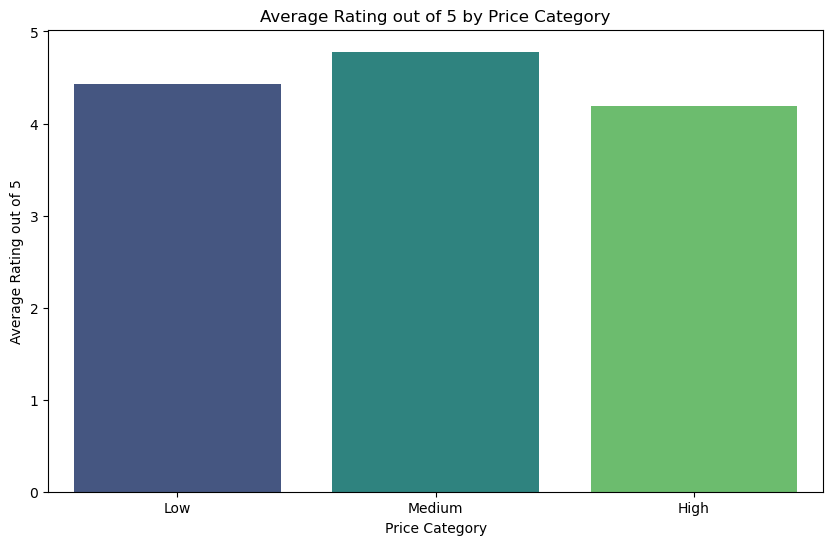

In [57]:
# Plotting the mean number of reviews for each price category
plt.figure(figsize=(10, 6))
sns.barplot(x='Price_Category', y='Rating out of 5', data=price_analysis, palette='viridis')
plt.title('Average Rating out of 5 by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Rating out of 5')
plt.show()

*The relationship between price and rating is not linear. Medium-priced banjos have the highest average rating (4.78), followed by low-priced (4.43), and then high-priced (4.19). This suggests that price is not the sole determinant of customer satisfaction. This may indicate a "sweet spot" where customers find good value for the quality and features offered.*

*My expert mentioned that they do tend to focus their stock on banjos with this medium price bracket. Perhaps they consciuosly or unconsciously already are aware of this sweet spot. It is interesting that the higher price bracket has the lowest average rating, which could be down to the professionals who are likely to be purchasing these expensive instruments. They have likely developed specific tastes through years of playing and know exactly what they want. When an instrument doesn't live up to these high expectations, they know how to communicate the aspects they take issue with.*

*My recommendation would be to concentrate on serving this middle ground in the market where it seems to be easier to strike a balance between quality and price.*

## Ratings Categories

**Now move on to 1.2 - prove the code**

Certainly! In this part of the analysis, we'll categorize the banjos based on their ratings and explore the features that contribute to higher or lower ratings. Similar to the price categories, we can define rating categories and analyze the distribution and characteristics within each group.

Step 1: Define Rating Categories
We can categorize the banjos into three groups based on their ratings: Low, Medium, and High.

Step 2: Assign Categories to Banjos
Based on the defined ranges, we'll create a new column in the DataFrame that assigns each banjo to a rating category.

Step 3: Visualize and Analyze the Categories
We'll visualize the distribution of banjos across the categories and analyze other variables within each category, such as the mean price and mean number of reviews.


**What is the mean rating for each category?**

It appears that I provided code to categorize the banjos by rating and analyze the mean price and number of reviews for each rating category, but I missed including the mean rating itself. 

This code will print a summary table displaying the mean price, mean number of reviews, and mean rating for each rating category (Low, Medium, High).

By running this code, you'll be able to see the mean rating for each category, along with other characteristics, to understand how different factors might be related to the ratings.

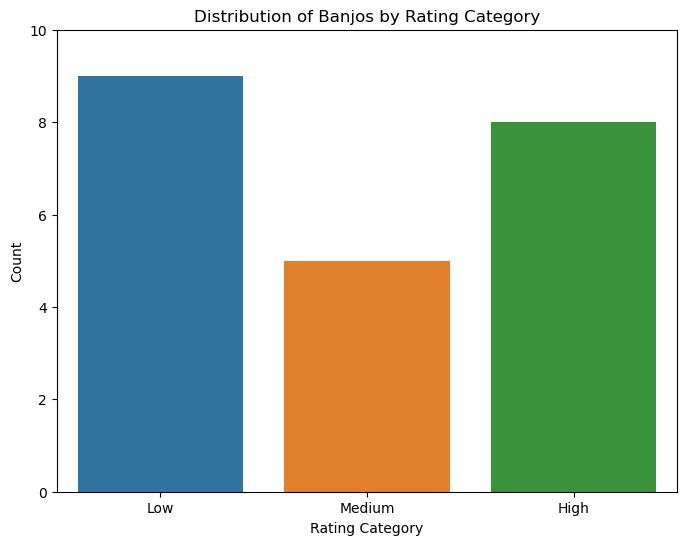

  Rating_Category  Price (GBP)  Number of reviews  Rating out of 5
0             Low   383.835000         133.222222         3.933333
1          Medium   726.926667          15.400000         4.580000
2            High   490.854286           1.875000         5.000000


In [33]:
# Step 1: Define Rating Categories
rating_bins = [df['Rating out of 5'].min(), df['Rating out of 5'].quantile(0.33), df['Rating out of 5'].quantile(0.66), df['Rating out of 5'].max()]
rating_labels = ['Low', 'Medium', 'High']

# Step 2: Assign Categories to Banjos
df['Rating_Category'] = pd.cut(df['Rating out of 5'], bins=rating_bins, labels=rating_labels, include_lowest=True)

# Step 3: Visualize and Analyze the Categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating_Category', data=df, order=rating_labels)
plt.title('Distribution of Banjos by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.ylim(0, ax.get_yticks()[-1])  # Set the y-axis scale to the highest value displayed
plt.show()

# Analyzing the mean price, number of reviews, and rating within each rating category
rating_analysis = df.groupby('Rating_Category')[['Price (GBP)', 'Number of reviews', 'Rating out of 5']].mean().reset_index()
print(rating_analysis)


*The high rating category has a perfect average rating of 5 but a very low average number of reviews. This might indicate a small number of specialty or niche products that have received high praise but have limited exposure or availability.*

**Now do a bar graph showing the mean number of reviews per rating category**

Certainly! To visualize the mean number of reviews per rating category, you can create a bar graph using the rating_analysis DataFrame, where the x-axis represents the rating categories (Low, Medium, High), and the y-axis represents the mean number of reviews.

This code will create a bar graph that shows the mean number of reviews for the Low, Medium, and High rating categories. It provides a visual representation of how the number of reviews varies across different rating ranges.

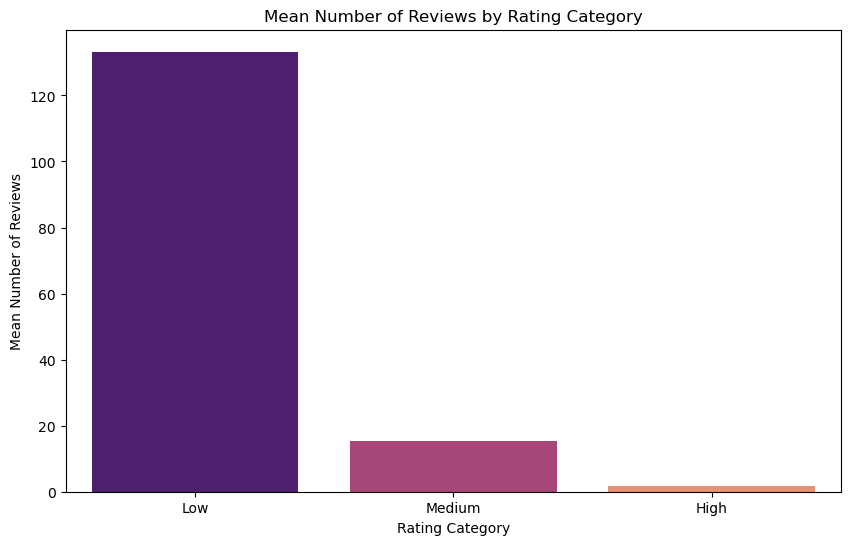

In [34]:
# Plotting the mean number of reviews for each rating category as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating_Category', y='Number of reviews', data=rating_analysis, palette='magma')
plt.title('Mean Number of Reviews by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Mean Number of Reviews')
plt.show()

*There is a clear negative relationship between rating and the number of reviews. As the rating category increases, the average number of reviews decreases. This may indicate that higher-rated banjos are less common*

## Outliers

**Let's move on to point 3. What would you do in terms of outlier analysis?**

Outlier analysis is crucial for identifying and understanding unusual observations in the dataset. These outliers may significantly impact statistical analyses and predictive modeling. Here's how you can approach outlier analysis for the banjo dataset:

Step 1: Identify Potential Outliers

1.1 Visual Inspection

Use box plots to visualize potential outliers in numerical columns like "Price," "Rating out of 5," "Number of reviews," "Length (cm)," "Width (cm)," "Height (cm)," and "Head Size (inch)."

1.2 Statistical Methods

Use statistical methods like the Z-score or the IQR (Interquartile Range) method to identify outliers numerically.

Step 2: Analyze the Outliers

Investigate the outliers to understand why they exist. Are they errors, or do they represent genuine extreme values?
Examine the corresponding "Name," "Description," "Rim," "Tone ring," "Tension hoop," etc., to understand the characteristics of the outliers.

Step 3: Decide How to Handle the Outliers

Depending on the analysis, decide whether to keep, modify, or remove the outliers.
If the outliers are errors or represent unusual conditions that are not relevant to the analysis, you might decide to remove or modify them.
If the outliers are genuine and relevant, you might decide to keep them but take their presence into account in subsequent analyses.

Example Code for Visual Inspection:

Here's an example code snippet to create box plots for "Price" and "Number of reviews" to visually inspect potential outliers:

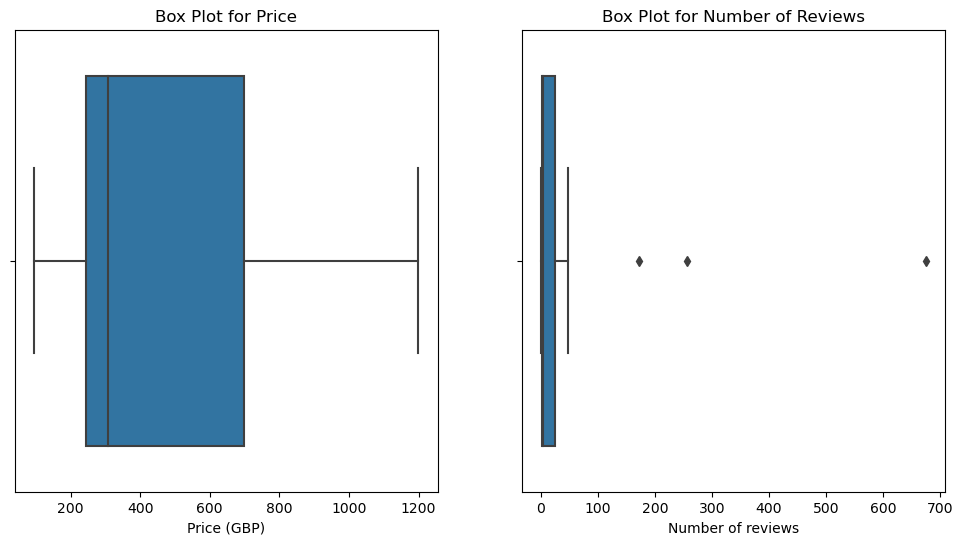

In [35]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Price (GBP)'])
plt.title('Box Plot for Price')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Number of reviews'])
plt.title('Box Plot for Number of Reviews')

plt.show()


These box plots will help you visually identify potential outliers in the "Price" and "Number of reviews" columns. You can repeat this for other numerical columns as well.

Outlier analysis is often specific to the context and the goals of the analysis, so the appropriate approach may vary based on what you want to understand or achieve.

## Text Length Analysis

**Now let's look at text length analysis. Analyse the length of 'Name' column first, and see how this correlates to the price and rating**

Certainly! Text length analysis can help us understand whether there is a relationship between the length of the text in the 'Name' column and other attributes like price and rating. Here's how we can perform this analysis:

Step 1: Calculate the Text Length
We'll create a new column in the DataFrame to store the length of the text in the 'Name' column.

Step 2: Visualize the Relationship
We'll create scatter plots to visualize the relationship between the text length and both the price and the rating.

Step 3: Analyze the Correlation
We'll calculate the correlation coefficients to quantify the relationship between the text length and both the price and the rating.

Let's start with Step 1 by calculating the text length for the 'Name' column (assuming the correct column name is 'Name (GBP)'). If the column name is different, please replace it with the correct name in the following code:

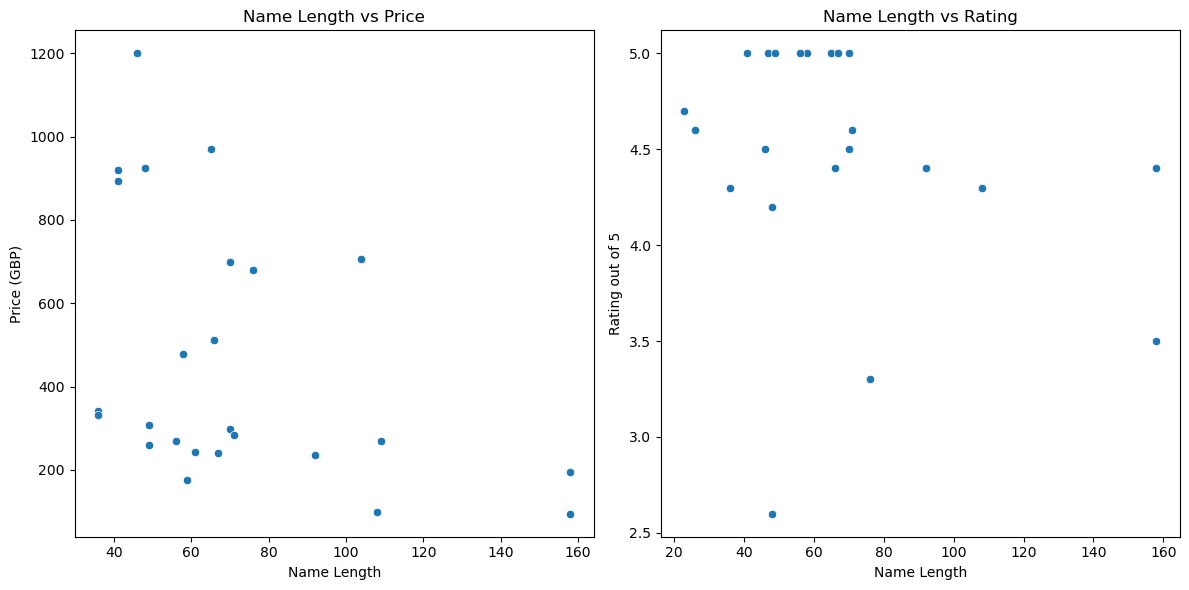

Correlation between Name Length and Price: -0.4175657488912563
Correlation between Name Length and Rating: -0.27260004015196904


In [36]:
# Step 1: Calculate the Text Length
df['Name_Length'] = df['Name'].apply(lambda x: len(str(x)))

# Step 2: Visualize the Relationship
plt.figure(figsize=(12, 6))

# Scatter plot for Name Length vs Price (GBP)
plt.subplot(1, 2, 1)
sns.scatterplot(x='Name_Length', y='Price (GBP)', data=df)
plt.title('Name Length vs Price')
plt.xlabel('Name Length')
plt.ylabel('Price (GBP)')

# Scatter plot for Name Length vs Rating
plt.subplot(1, 2, 2)
sns.scatterplot(x='Name_Length', y='Rating out of 5', data=df)
plt.title('Name Length vs Rating')
plt.xlabel('Name Length')
plt.ylabel('Rating out of 5')

plt.tight_layout()
plt.show()

# Step 3: Analyze the Correlation
correlation_price = df['Name_Length'].corr(df['Price (GBP)'])
correlation_rating = df['Name_Length'].corr(df['Rating out of 5'])
print(f"Correlation between Name Length and Price: {correlation_price}")
print(f"Correlation between Name Length and Rating: {correlation_rating}")


*The correlation value of -0.4176 indicates a moderate negative linear relationship between the length of the name and the price of the banjo. This suggests that, on average, banjos with shorter names tend to be priced higher, while those with longer names tend to be priced lower. Perhaps with higher priced instruments, the seller relies upon the brand name more, but with cheaper instruments more weight is placed on the included accessories etc which are included in the name when advertising on Amazon.*

*The correlation value of -0.2726 indicates a weak negative linear relationship between the length of the name and the rating of the banjo. This suggests that banjos with shorter names tend to receive slightly higher ratings.*

**Now do the same for the length of Description**

Certainly! We can perform a similar analysis on the 'Description' column to explore how the length of the descriptions correlates with the price (in the 'Price (GBP)' column) and rating (in the 'Rating out of 5' column).

This code calculates the length of the text in the 'Description' column, creates scatter plots to visualize the relationship between the description length and both the price and the rating, and calculates the correlation coefficients to quantify these relationships.

By analyzing the text length of the descriptions, you may uncover insights into how detailed descriptions relate to price and customer satisfaction.

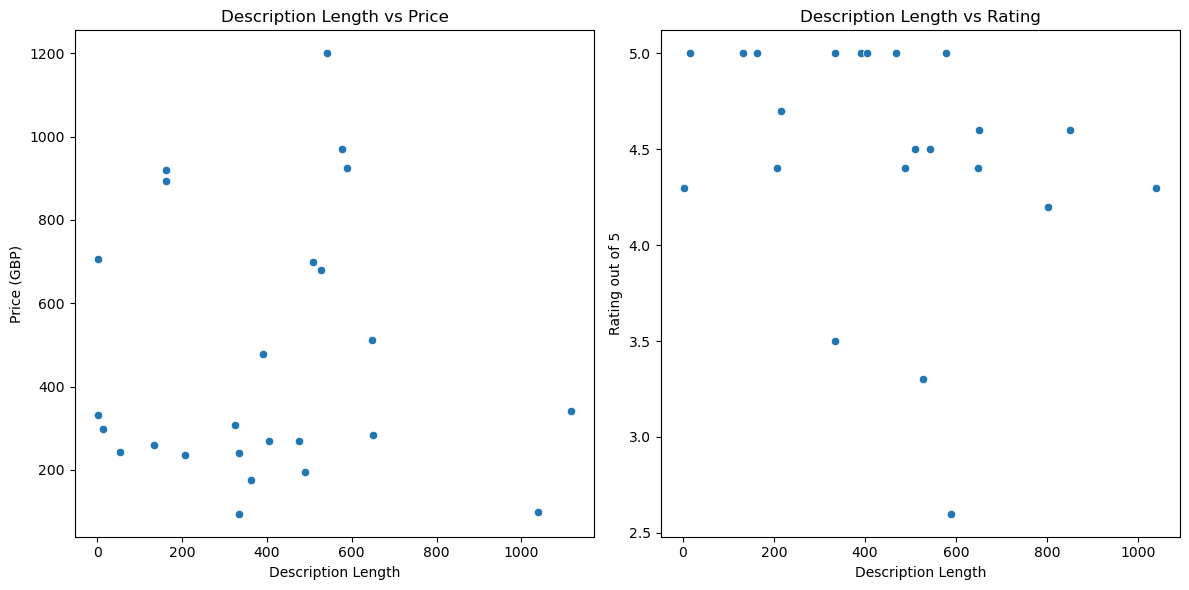

Correlation between Description Length and Price: -0.006120215121964233
Correlation between Description Length and Rating: -0.2612929498389636


In [74]:
# Step 1: Calculate the Text Length of Description
df['Description_Length'] = df['Description'].apply(lambda x: len(str(x)))

# Step 2: Visualize the Relationship
plt.figure(figsize=(12, 6))

# Scatter plot for Description Length vs Price (GBP)
plt.subplot(1, 2, 1)
sns.scatterplot(x='Description_Length', y='Price (GBP)', data=df)
plt.title('Description Length vs Price')
plt.xlabel('Description Length')
plt.ylabel('Price (GBP)')

# Scatter plot for Description Length vs Rating
plt.subplot(1, 2, 2)
sns.scatterplot(x='Description_Length', y='Rating out of 5', data=df)
plt.title('Description Length vs Rating')
plt.xlabel('Description Length')
plt.ylabel('Rating out of 5')

plt.tight_layout()
plt.show()

# Step 3: Analyze the Correlation
correlation_price_desc = df['Description_Length'].corr(df['Price (GBP)'])
correlation_rating_desc = df['Description_Length'].corr(df['Rating out of 5'])
print(f"Correlation between Description Length and Price: {correlation_price_desc}")
print(f"Correlation between Description Length and Rating: {correlation_rating_desc}")


*There is no evidence to suggest that the length of the description influences the price of a banjo based on the calculated correlation. There is a weak negative correlation with the rating, suggesting that banjos with concise descriptions receive slightly higher ratings from customers.*

*In conclusion, I think a customer's rating of a banjo is likely to be based on their experience playing the instrument, the sound quality, build, etc. The description may influence the initial purchase decision but is unlikely to be a significant factor in the rating after the customer has interacted with the banjo.*

## Impact of Accessories and Additional Features

**This is the next thing i want you to investigate: 9. Impact of Accessories and Additional Features**

Analyzing the impact of accessories and additional features on price, ratings, or other characteristics can be a valuable exercise to understand what drives value and customer satisfaction.

Here's a plan to investigate the impact of accessories and additional features:

Step 1: Identify Accessories and Additional Features

Extract information about accessories and additional features from the 'Name' or 'Description' columns. This may involve identifying specific keywords, phrases, or patterns that represent accessories or features.

Step 2: Create New Columns for Identified Features

Create binary columns (0 or 1) for each identified accessory or feature to represent whether a particular banjo includes that accessory or feature.

Step 3: Analyze the Impact

Compare the price, ratings, and other characteristics across banjos with and without specific accessories or features.
Utilize visualizations like bar plots, box plots, or scatter plots to visualize these comparisons.

Step 4: Statistical Analysis (Optional)

Perform statistical tests (e.g., t-tests) to assess whether the differences in price or ratings across groups are statistically significant.

Example Code for a Hypothetical Feature:

Suppose we want to analyze the impact of a hardshell case (a common accessory for musical instruments) on price and ratings. We need to identify this feature in the 'Name' or 'Description' column and then compare the characteristics.

Here's a code snippet to get started with this analysis:

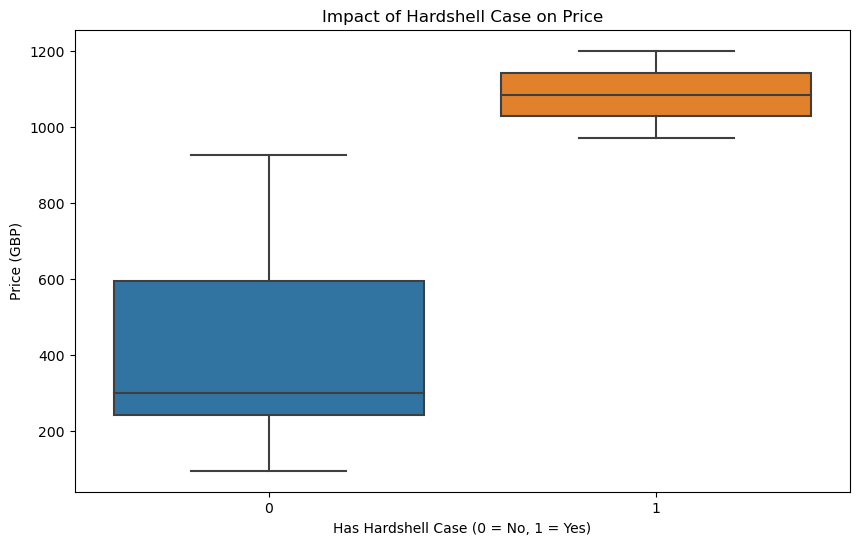

In [75]:
# Step 1: Identify the Feature (e.g., hardshell case)
df['Has_Hardshell_Case'] = df['Description'].apply(lambda x: 1 if 'hardshell case' in str(x).lower() else 0)

# Step 2: Analyze the Impact on Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has_Hardshell_Case', y='Price (GBP)', data=df)
plt.title('Impact of Hardshell Case on Price')
plt.xlabel('Has Hardshell Case (0 = No, 1 = Yes)')
plt.ylabel('Price (GBP)')
plt.show()

# Analyze other characteristics such as ratings similarly


This code snippet assumes that the presence of a hardshell case is mentioned in the 'Description' column and uses a box plot to compare the price distribution for banjos with and without a hardshell case.

You can repeat this process for other accessories and features by identifying relevant keywords or phrases.

This analysis can provide insights into how specific accessories or features influence price, ratings, and potentially other aspects of the banjos.

Please note that the success of this analysis depends on the consistency and detail of the text descriptions in the dataset. If the information is not clearly mentioned, this analysis may become more complex and may require more advanced text processing techniques.

**Print the number of banjos that did / didn't have hardshell cases**

Sure! You can easily count the number of banjos that did and didn't have hardshell cases using the 'Has_Hardshell_Case' column we created earlier. 

This code snippet will print the number of banjos that have a hardshell case (as indicated by a 1 in the 'Has_Hardshell_Case' column) and the number that don't (as indicated by a 0).

This information can help you understand how common this accessory is among the banjos in the dataset and can be a useful context for further analyses.

In [77]:
# Counting the number of banjos with and without hardshell cases
hardshell_case_count = df['Has_Hardshell_Case'].value_counts()

# Number of banjos with a hardshell case
banjos_with_hardshell_case = hardshell_case_count[1]

# Number of banjos without a hardshell case
banjos_without_hardshell_case = hardshell_case_count[0]

print(f"Number of banjos with a hardshell case: {banjos_with_hardshell_case}")
print(f"Number of banjos without a hardshell case: {banjos_without_hardshell_case}")


Number of banjos with a hardshell case: 2
Number of banjos without a hardshell case: 27


**Analyse the correlation**

Certainly! After identifying specific accessories or additional features and creating binary columns to represent their presence, we can analyze the correlation between these features and other numerical variables like price and ratings. This will help us understand how the inclusion of certain accessories or features is related to the price, ratings, or other characteristics of the banjos.

Continuing with the example of a hardshell case, here's how you can analyze the correlation between the presence of a hardshell case and both the price and rating:

These lines of code calculate and print the correlation coefficients between the presence of a hardshell case (as a binary variable) and both the price and the rating. The correlation coefficients provide a numerical measure of the linear relationship between these variables.

A positive correlation indicates that the presence of a hardshell case is associated with higher prices or ratings, while a negative correlation indicates an association with lower prices or ratings.

You can repeat this process for other accessories or additional features by identifying relevant keywords or phrases and creating corresponding binary columns.

Keep in mind that correlation does not imply causation, and these relationships may be influenced by other factors. A more comprehensive analysis might include multiple regression to control for other variables.

In [76]:
# Calculate the correlation between the presence of a hardshell case and price
correlation_price_hardshell = df['Has_Hardshell_Case'].corr(df['Price (GBP)'])
print(f"Correlation between Hardshell Case and Price: {correlation_price_hardshell}")

# Calculate the correlation between the presence of a hardshell case and rating
correlation_rating_hardshell = df['Has_Hardshell_Case'].corr(df['Rating out of 5'])
print(f"Correlation between Hardshell Case and Rating: {correlation_rating_hardshell}")


Correlation between Hardshell Case and Price: 0.5927068146630445
Correlation between Hardshell Case and Rating: 0.1451986650547473


*The value 0.5927 indicates a moderate strength in the relationship. This suggests that the presence of a hardshell case is associated with price but is not the sole determinant. There are various reasons there could be a relationship here: A hardshell case may add value to the banjo by providing protection, and enhancing portability; premium brands might include a hardshell case as a standard accessory which pushes up the price; and banjos that come with the case could be targeted at pro musicians as opposed to cheaper beginner instruments. The price could just be a product of the increased price to the retailer for including a case.*

*In terms of further data collection, it would be valuable to find the same model of banjo listed with with and without a hardcase. If the increased margin on selling a banjo WITH a hardcase is greater than the cost of buying stock of new hardcases, it would be a straightforward recommendation for the banjo refurbishment company.*

*From my own experience buying/selling guitar gear I can think of a few examples of product mispricing. A new Vox AC30 amp with a Celestion Blue speaker often retails for more than the price of buying the exact same amp fitted with a Celestion Green speaker + a separate Celestion Blue speaker. So you get 2 speakers with your amp for less than the price of 1. (Changing speakers is only a matter of soldering 1 wire).*

*It should be noted that only 2 banjos in the dataset had hardcases, so this is by no means conclusive.*

## Using Pandas Profile Report

*I came across a youtube video that claimed to automate data analysis in 1 line of python code using pandas profiling.*

*Surprisingly it came back with quite a lot of useful information, similar to what has been done so far. I take issue with a lot of the figures in the correlation matrix though, as they don't align with the correlations I've already calculated.*

*It did flag up some alerts for columns I haven't looked at in much detail yet.*

In [37]:
!pip install pandas-profiling==2.7.1

  Using cached visions-0.4.1-py3-none-any.whl (58 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.4.0 requires visions[type_image_path]==0.7.5, but you have visions 0.4.1 which is incompatible.


In [38]:
pip install ydata-profiling

  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 2.7.1 requires visions[type_image_path]==0.4.1, but you have visions 0.7.5 which is incompatible.


In [3]:
from ydata_profiling  import ProfileReport

In [4]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*The alerts page of the above Pandas Profiling Report has provided some other relationships with a high correlation that may be useful to investigate further. I have overlooked some of these relationships due to the small number of data points available, but they could provide avenues for new data collection. The first alert tells me that Price (GBP) is highly overall correlated with Tension hoop for example, which I had ignored due to only 5 banjos having a value for 'Tension hoop' which was derived from the description column. Lets investigate further:*

**Can you explore the relationship between the Tension hoop and price?**

In [41]:
# Displaying the unique values and their counts in the "Tension hoop" column
tension_hoop_values = df['Tension hoop'].value_counts()
tension_hoop_values.head(10)

Notched steel    3
Flat bar         2
Name: Tension hoop, dtype: int64

It appears that the "Tension hoop" column contains categorical information describing the type of tension hoop used in the banjo, such as "Notched steel" and "Flat bar."

Given the limited number of unique values, we can explore the relationship between the tension hoop and price by visualizing the average price for each type of tension hoop. A bar plot can be an effective way to present this information.

Let's proceed by creating a bar plot that shows the mean price for each tension hoop category:


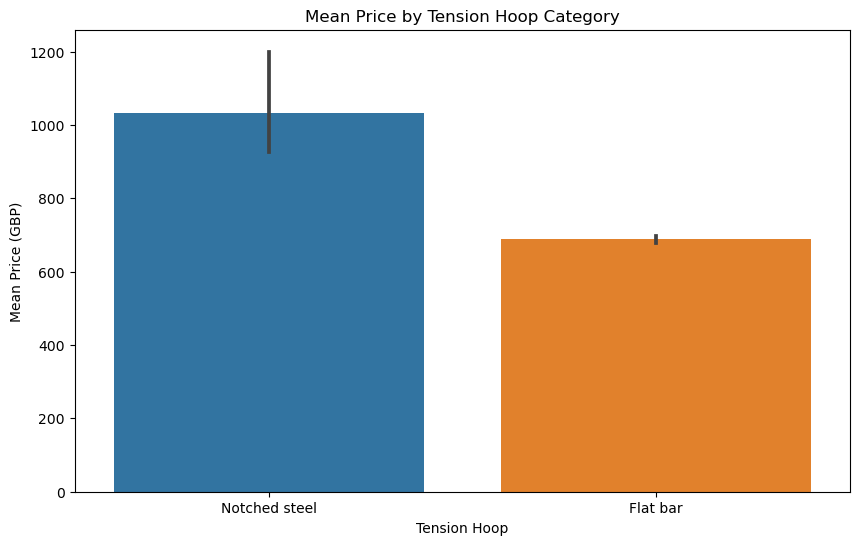

In [42]:
# Importing the seaborn library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a bar graph to show the mean price for each tension hoop category
plt.figure(figsize=(10, 6))
sns.barplot(x='Tension hoop', y='Price (GBP)', data=df)
plt.title('Mean Price by Tension Hoop Category')
plt.xlabel('Tension Hoop')
plt.ylabel('Mean Price (GBP)')
plt.show()

**Calculate the relationship between price and tension hoop**

The calculated relationship between the type of tension hoop and the price of the banjos is as follows:

Flat Bar:

Mean Price (GBP): £688.68
Median Price (GBP): £688.68
Standard Deviation (GBP): £13.64
Notched Steel:

Mean Price (GBP): £1031.44
Median Price (GBP): £969.24
Standard Deviation (GBP): £147.22
From these statistics, we can observe that banjos with a "Notched steel" tension hoop tend to be more expensive on average compared to those with a "Flat bar" tension hoop. The higher standard deviation for "Notched steel" also indicates a wider spread of prices within that category.

Calculating the correlation between a categorical variable (such as "Tension hoop") and a continuous variable (like "Price (GBP)") requires converting the categorical variable into a numerical format. One common approach is to use encoding, where each unique category is assigned a numerical value.

Since "Tension hoop" has only two categories, we can use binary encoding, where one category is represented as 0 and the other as 1. Then we can calculate the Pearson correlation coefficient between the encoded "Tension hoop" and the "Price (GBP)".

Let's proceed with this approach to calculate the correlation:

In [43]:
# Encoding the "Tension hoop" column using binary encoding
df['Tension_hoop_encoded'] = df['Tension hoop'].map({'Flat bar': 0, 'Notched steel': 1})

# Calculating the correlation between the encoded "Tension hoop" and "Price (GBP)"
correlation_tension_hoop_price = df['Tension_hoop_encoded'].corr(df['Price (GBP)'])
correlation_tension_hoop_price

0.8741057774444609

The calculated Pearson correlation coefficient between the type of tension hoop and the price of the banjos is approximately 
0.8741
0.8741.

This positive value indicates a strong positive correlation between the two variables. In other words, banjos with a "Notched steel" tension hoop (encoded as 1) tend to have higher prices, while those with a "Flat bar" tension hoop (encoded as 0) tend to have lower prices.

Keep in mind that correlation does not imply causation, and this analysis only captures the linear relationship between the variables. Other factors not considered here may also influence the price.

*There are a number of theories that come to mind as to why this correlation exists, but the obvious thing to start by saying is that it is based off a sample size of 5, so conclusions can't be drawn at this point.*

*This correlation could be down to the component quality or manufacturing complexity of producing a notched steel vs flat bar tension hoop. This could lead to better sound quality, or durability which potential customers are willing to pay more for. A notched hoop could just require additional processing which will drive up the manufacturing cost.*

*Between my own experience with buying/selling guitars, and the insights drawn from my interview with an expert, I'm very aware of how particular musicians can be about instruments. The appearance of an instrument has to be exactly right if customers are to pay a premium for an instrument, so it is possible that a flat bar tension hoop just doesn't "look right". Many unfounded assumptions and myths exist in the world of musical instruments, so it could be a belief that a notched tension hoop influences the tone in a favourable way. (In the world of guitar pedals you'll often see debates online around the brand of batteries used to power the pedal for instance, and imagined tonal differences between them).*

*More data would need to be collected to see if the correlation is a coincidence, and it might be beneficial to speak to some banjo players to find out if perceptions exist. This could make an interesting recommendation depending on how much cost/effort is involved in providing notched steel tension hoops with refurbished banjos.*